# Project 2 - Investigate A Dataset

## Background Information

Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 


In [65]:
# import all necessary packages and functions.
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import math
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt

## Data Wrangling

In [66]:
df = pd.read_csv("titanic-data.csv") # load the data into a dataframe using Pandas 
                                     
df.head()                            #first five rows of dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


VARIABLE DESCRIPTIONS:

survival :        Survival
                (0 = No; 1 = Yes)
                
pclass :          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
                
name :            Name

sex :            Sex

age :             Age

sibsp :           Number of Siblings/Spouses Aboard

parch :           Number of Parents/Children Aboard

ticket :          Ticket Number

fare :            Passenger Fare

cabin :           Cabin

embarked :       Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)


### Data Cleaning

Removing fields Name and Ticket should be dropped as they do not affect the survival rate of the passenger.

In [67]:
df = df.drop(["Name", "Ticket"], axis=1)   #Dropping two fields name and tickets

In [68]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [69]:
df.describe() #Full descrption of numerical data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


"Cabin" and "Embarked" are non-numerical so checking number of null values in both of them

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


Cabin only having 204 entries out of 891

Age only having 714 entries out of 891

Embarked only having 889 entries out of 891

Removing "Cabin" from dataframe due to more outlier data for accurate results.
Also passenger could possibly not at his/her cabin at that time

In [71]:
df = df.drop(["Cabin"], axis=1) #Removing Cabin from data frame

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [73]:
df['Survived'].sum() #total survived out of 891

342

> from above data all fields except Age don't contain any NaN
Removing Nan from Age


In [74]:
df.loc[:,"Survived"] = df["Survived"].astype(bool)    #Converting survived data to boolean i.e True and False
known_age_passengers = df.dropna(subset = ["Age"])    #Making another dataframe containing numerical ages data
known_age_passengers.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,False,3,male,22.0,1,0,7.2500,S
1,2,True,1,female,38.0,1,0,71.2833,C
2,3,True,3,female,26.0,0,0,7.9250,S
3,4,True,1,female,35.0,1,0,53.1000,S
4,5,False,3,male,35.0,0,0,8.0500,S


### Questions that could be answered after data analysis

-> What could be factors that affected the survival rate?

-> Is upper class people given more preference for survival than lower ones?

-> Which gender survived more?

-> Is there any age group who survived more compared to others?

### Some Functions to reduce redundancy

In [75]:
def dualsurvival(df_tuple,df_index,nbin,title,x_label,y_label):   #Function to create histogram based on survived and not survived 
    plt.figure(figsize=(10, 5))
    df_tuple.hist(bins=nbin, color="r", label="Not Survived")
    df_tuple[df_index].hist(bins=nbin, color="g", label="Survived")
    plt.legend(prop={"size":15})
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [76]:
def groupby_bar(p_bygroup,title,x_label,y_label):  #Function to generate survival bar graph for group by particular field 
    p_total = p_bygroup.count()
    p_survived = p_bygroup.sum()
    p_total.plot(kind="bar", color="r", label="Not Survived")
    p_survived.plot(kind="bar", color="g", label="Survived")
    plt.legend(loc=2)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

### Relation of passenger class with survival rate

In [77]:
passengers_by_class = df.groupby('Pclass')['Survived'] #Grouping passenger by their classes 1,2, and 3
passengers_by_class.describe()

Pclass        
1       count       216
        unique        2
        top        True
        freq        136
2       count       184
        unique        2
        top       False
        freq         97
3       count       491
        unique        2
        top       False
        freq        372
Name: Survived, dtype: object

-> Class 1 : 136 survived from 216

-> Class 2 : 87 survived from 184

-> Class 3 : 119 survived from 491

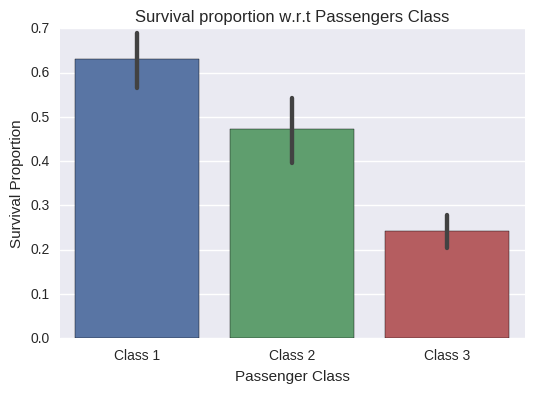

In [78]:
bplot=sns.barplot(data=df, x="Pclass", y="Survived")      #bargraph of mean survival rate w.r.t passangers class
bplot.set(title='Survival proportion w.r.t Passengers Class',
            xlabel = 'Passenger Class',
            ylabel = 'Survival Proportion',
            xticklabels = ['Class 1', 'Class 2', 'Class 3'])

-> Class 1 : 62.9% survival rate

-> Class 2 : 47.28% survival rate

-> Class 3 : 24.2% survival rate

Clearly survival rate is high for high class passangers. 

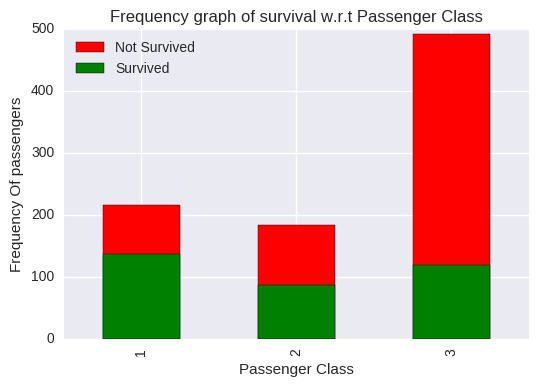

In [92]:
groupby_bar(passengers_by_class,"Frequency graph of survival w.r.t Passenger Class","Passenger Class",
            "Frequency Of passengers")   
#Frequency of survived and not survived in different classes

### Relation of Passenger Gender with Survival Rate

In [80]:
passengers_by_sex = df.groupby('Sex')['Survived'] # grouping passengers according to their sex i.e male or female
passengers_by_sex.describe()

Sex           
female  count       314
        unique        2
        top        True
        freq        233
male    count       577
        unique        2
        top       False
        freq        468
Name: Survived, dtype: object

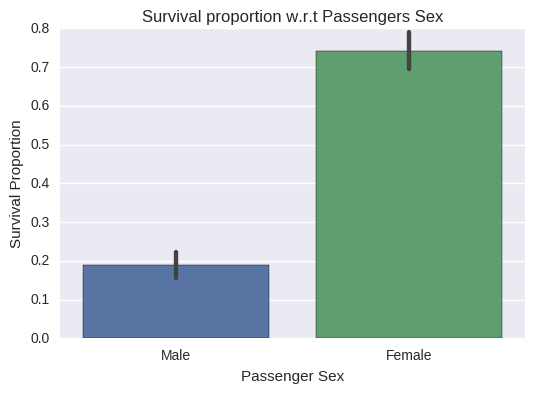

In [81]:
bplot=sns.barplot(data=df, x="Sex", y="Survived") #bargraph of mean survival rate w.r.t passangers sex
bplot.set(title='Survival proportion w.r.t Passengers Sex',
            xlabel = 'Passenger Sex',
            ylabel = 'Survival Proportion',
            xticklabels = ['Male', 'Female'])

Male :  18.89% survived

Female: 74.2% survived

Survival is more in females

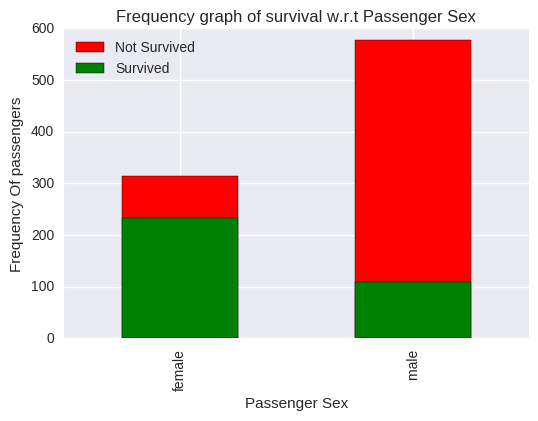

In [82]:
groupby_bar(passengers_by_sex,"Frequency graph of survival w.r.t Passenger Sex","Passenger Sex",
            "Frequency Of passengers")   #Frequency of survived and not survived in different genders

### How age affects survival ..

In [83]:
known_age_passengers.describe()     #description of passengers 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Mean Age: 29.699

Max Age: 80

Min Age:0.42 (5 months approx)

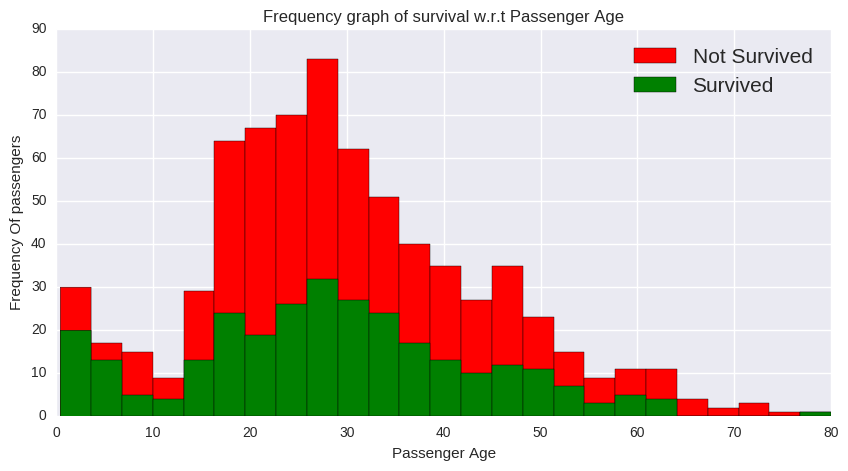

In [84]:
dualsurvival(known_age_passengers["Age"],known_age_passengers["Survived"],25,"Frequency graph of survival w.r.t Passenger Age","Passenger Age",
            "Frequency Of passengers") #Frequency distribution of age vs survival

Graph is showing that 20-30 age group is most survived but their total% is also more.

All and all there is not much difference due to age in survival rate.

Still graph is showing that age below 15(children) has high survival rate %

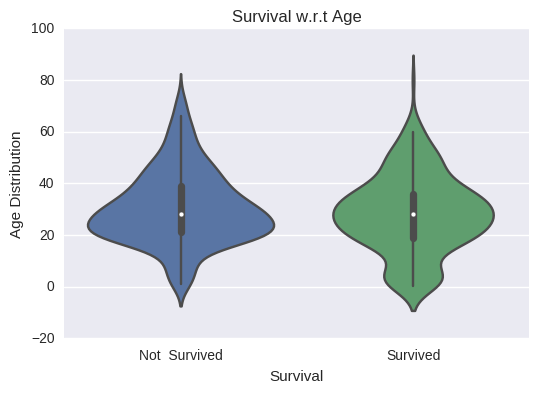

In [85]:
 vplot = sns.violinplot(x="Survived", y="Age", data=df)
 vplot.set(title='Survival w.r.t Age',
            xlabel = 'Survival',
            ylabel = 'Age Distribution',
            xticklabels = ['Not  Survived', 'Survived'])

Through this violinplot its is observed that:
Survival is diminishing when moving towards higher above 60 and not much difference is noted between 40-60 age group.
Survival is quite average in the range 15-40.
Survival rate is high in the age below 15.

### Passengers Fare relation with Survival Rate

In [86]:
passengers_by_fare = df.groupby('Fare')['Survived'].mean()  #grouping by Fares of Passengers
passengers_by_fare.describe()

count    248.000000
mean       0.440193
std        0.420482
min        0.000000
25%        0.000000
50%        0.491935
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

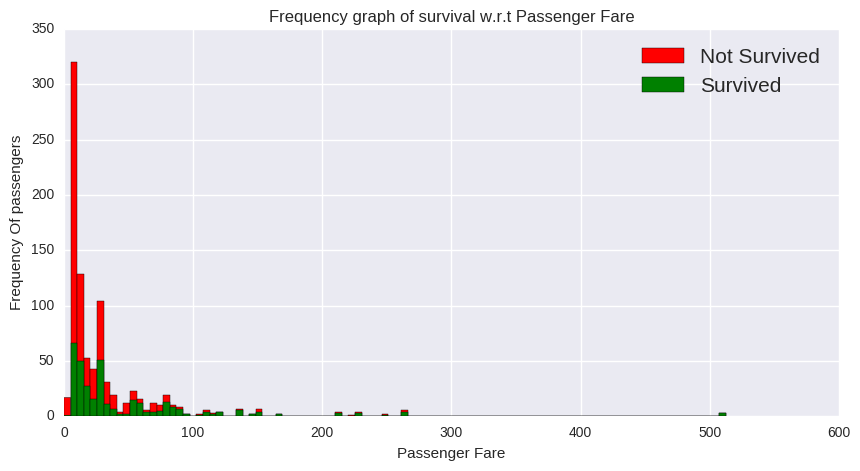

In [87]:
dualsurvival(df["Fare"],df["Survived"],100,"Frequency graph of survival w.r.t Passenger Fare","Passenger Fare",
            "Frequency Of passengers")   #Frequency distribution of fare vs survival

It shows that passengers paying high fare were more survived i.e high class or Rich passengers.

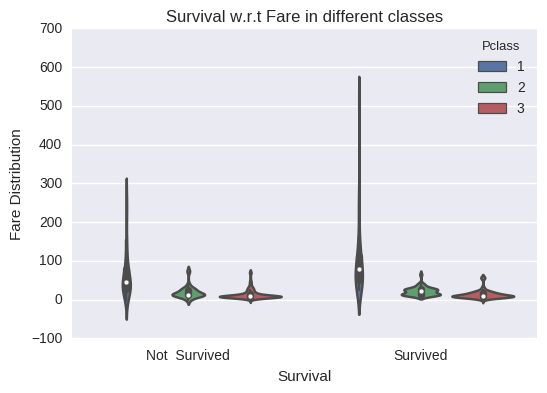

In [88]:
vplot = sns.violinplot(x="Survived", y="Fare",hue="Pclass", data=df)
vplot.set(title='Survival w.r.t Fare in different classes',
            xlabel = 'Survival',
            ylabel = 'Fare Distribution',
            xticklabels = ['Not  Survived', 'Survived'])

Clearly depicts that Class 1 has more survival rate and also high fares.
This shows that passengers with high class and high fares were more likely to survive.

### Relation Of Embarkment with Survival Rate and Passengers Class

In [89]:
passengers_by_embark = df.groupby('Embarked')['Survived']   #Grouping according to embarkment of passengers and 
passengers_by_embark.describe()                             #finding their survival rate

Embarked        
C         count       168
          unique        2
          top        True
          freq         93
Q         count        77
          unique        2
          top       False
          freq         47
S         count       644
          unique        2
          top       False
          freq        427
Name: Survived, dtype: object

Most passengers were from Southampton(S) i.e 644 and 427 couldn't survive.

Survival % is more in Cherbourg(C) i.e 55.3%

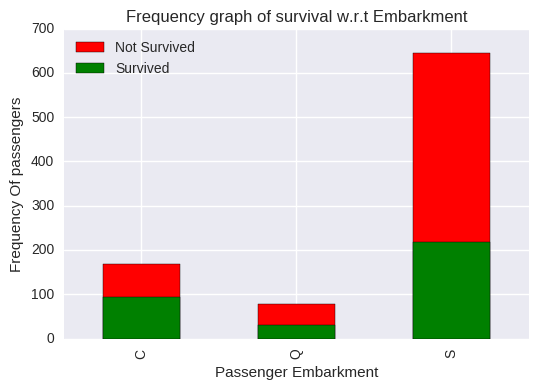

In [90]:
groupby_bar(passengers_by_embark,"Frequency graph of survival w.r.t Embarkment","Passenger Embarkment",
            "Frequency Of passengers")            #frequency distribution of embarkment with survival rate

It shows most passengers able to survive is from Southampton(S).

But ratio wise Cherbourg(C) is most successful in survival.

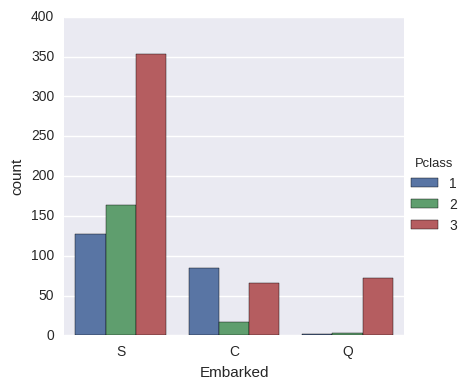

In [91]:
sns.factorplot('Embarked',  data=df, hue='Pclass', kind='count', hue_order=[1,2,3])

Looking at the graph we see S, Q, C corresponds to Southampton, Queenstown, Cherbourg. What can be observed from the graph is that the majority of passengers comes from Southhampton. Investigating more into southhampton we see the majority of Southhampton that boarded the Titanic are Pclass 3 and a more equal split between Pclass 1 and 2. In terms of Queenstown it was predomantly Pclass 3, while Cherbourg has a pretty close split between Pclass 1 and 3.
That shows C has more no of Class 1 compared to 2 and 3 thats why its survival rate is high.

## Conclusion

### Limitations

Since data set is not proper therefore causing some limitations in analysis.

-> Existence of null values(NaN) in "Age" and "Cabin" fields i.e 177 and 687 out of 891 respectively. Existence of these null values make data analysis unreliable as we have to ignore some rows due to null values of some fields.

-> Also for some "Cabin" values more than one Cabins were assigned to a single Passenger causing problem to analyse it.

-> Data could also contain some info about how other passenger were saved and no of lifeboats available.

-> More specific locations of the cabins and how near they are from life boats and their level on the boat could also be provided to get more accurate results.

->Also this dataset consist of data after titanic sank so some information could also be collected from persons who survived and based on that more analysis could be done.

### Results(Answers for questions)

#### What could be factors that affected the survival rate?

-> Survival mainly depended on factors "Passengers Class" ,"Gender" and somewhat "Age group" also.

#### Is upper class people given more preference for survival than lower ones?

-> Yes, Passengers travelling in 1st class survived most around 63% while 3rd class passengers survived the least around 24%, even though 3rd class passengers were maximum (491).

#### Which gender survived more?

-> Females (74.2%) had a way higher rate of survival than males (18.9%) which shows that femals were tried to save first.

#### Is there any age group who survived more compared to others?

-> Passsengers with age nearby 29 survive the most, but  they were present in more numbers, there's no reliable relationship between age and survival rate.

-> Ratiowise its observed that chidren below 15 are mostly survived

#### Does fare and embarkment had any effect on results?

-> Yes it could be considered as these also had relation with Class Of passengers i.e paying more fares and from developed city specifies more high class.

This shows that High class passengers, children and females were given most preference for survival i.e they were tried to save first.

## Refrences

Titanic dataset ("titanic-data.csv")

Video Lessons(Intro to Data Analysis)

Kaggle titanic data info (https://www.kaggle.com/c/titanic/data)

Pandas documentation (http://pandas.pydata.org/pandas-docs/stable/#)

Seaborn documentation (https://stanford.edu/~mwaskom/software/seaborn/)

Violinplot documentation (https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.violinplot.html)